# Pair Programming Estadística II

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando ayer y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.  

**Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.**  

>Se ruega a la hora de realizar la entrega que incluyáis el conjunto de datos que hayáis decidido emplear para estos ejercicios.  

**Objetivos**  

Los objetivos de hoy son:  

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
    - Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
    - Percentiles 25, 75
    - Rango Intercualtílico
    - Boxplot de algunas variables
    - Tabla de frecuencias
        - Variables cualitativas
        - Variables cuantitativas
        - Frecuencia acumulada
        - Representación de al menos una tabla de frecuencias  

In [8]:
df = pd.read_csv('datos/open.csv', index_col=0)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,Friday,2015-07-31,5263,555,1,1,0,1
1,2,Friday,2015-07-31,6064,625,1,1,0,1
2,3,Friday,2015-07-31,8314,821,1,1,0,1
3,4,Friday,2015-07-31,13995,1498,1,1,0,1
4,5,Friday,2015-07-31,4822,559,1,1,0,1


In [37]:
# Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
# para la columna 'Sales'
print(f"La media de ventas de todas las tiendas por día es €{round(df['Sales'].mean(), 2)}")
print(f"La moda de ventas de todas las tiendas por día es €{round(df['Sales'].mode()[0], 2)}")
print(f"La mediana de ventas de todas las tiendas por día es €{round(df['Sales'].median(), 2)}")
print(f"El máximo de ventas de todas las tiendas por día es €{round(df['Sales'].max(), 2)}")
print(f"El mínimo de ventas de todas las tiendas por día es €{round(df['Sales'].min(), 2)}")

La media de ventas de todas las tiendas por día es €6955.51
La moda de ventas de todas las tiendas por día es €5674
La mediana de ventas de todas las tiendas por día es €6369.0
El máximo de ventas de todas las tiendas por día es €41551
El mínimo de ventas de todas las tiendas por día es €0


In [39]:
# Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
# para la columna 'Customers'
print(f"La media de clientes por día es {round(df['Customers'].mean(), 2)}")
print(f"La moda de clientes de por día es {round(df['Customers'].mode()[0], 2)}")
print(f"La mediana de clientes por día es {round(df['Customers'].median(), 2)}")
print(f"El máximo de clientes por día es {round(df['Customers'].max(), 2)}")
print(f"El mínimo de clientes por día es {round(df['Customers'].min(), 2)}")

La media de clientes por día es 762.73
La moda de clientes de por día es 560
La mediana de clientes por día es 676.0
El máximo de clientes por día es 7388
El mínimo de clientes por día es 0


In [43]:
# Percentiles 25, 75 e IQR para la columna 'Sales'
q1, q3 = np.percentile(df['Sales'], [25, 75])
print(f"El percentil 25 de la columna 'Sales' es €{q1}")
print(f"El percentil 75 de la columna 'Sales' es €{q3}")
print(f"El IQR de la columna 'Sales' es €{q3-q1}")

El percentil 25 de la columna 'Sales' es €4859.0
El percentil 75 de la columna 'Sales' es €8360.0
El IQR de la columna 'Sales' es €3501.0


In [42]:
# Percentiles 25, 75 e IQR para la columna 'Customers'
q1c, q3c = np.percentile(df['Customers'], [25, 75])
print(f"El percentil 25 de la columna 'Customers' es {q1c}")
print(f"El percentil 75 de la columna 'Customers' es {q3c}")
print(f"El IQR de la columna 'Customers' es {q3c-q1c}")

El percentil 25 de la columna 'Customers' es 519.0
El percentil 75 de la columna 'Customers' es 893.0
El IQR de la columna 'Customers' es 374.0


<AxesSubplot:xlabel='Sales'>

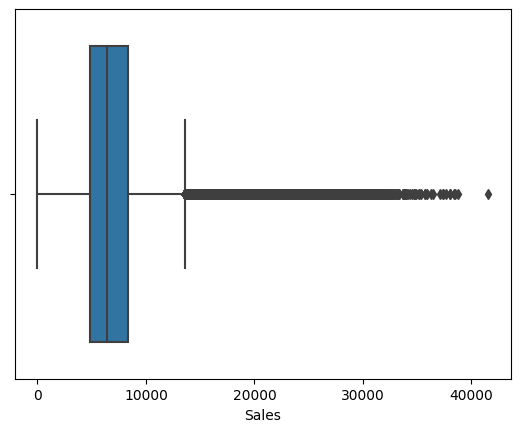

In [14]:
# Boxplot de la columna 'Sales'
sns.boxplot(x=df['Sales'], data=df)

- Llama la atención la cantidad de datos atípicos que aparecen

<AxesSubplot:xlabel='Customers'>

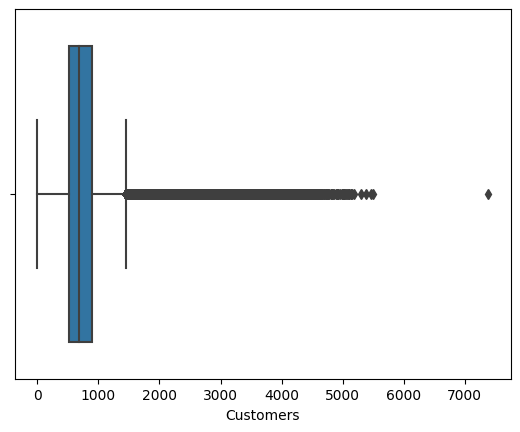

In [15]:
# Boxplot de la columna 'Customers'
sns.boxplot(x=df['Customers'], data=df)

- Llama la atención la cantidad de datos atípicos que aparecen

In [51]:
# TABLA DE FRECUENCIAS DE LA COLUMNA 'Sales':
# Creamos una columna categórica. Seleccionamos los bins de manera que veamos en las tres primeras categorías los valores típicos y en las dos últimas los atípicos
df['SalesRange'] = pd.cut(x=df['Sales'], bins=(0, q1, q3, 13000, 30000, df['Sales'].max()), labels=['Low', 'Normal', 'High', 'Very high', 'Extraordinay'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesRange
0,1,Friday,2015-07-31,5263,555,1,1,0,1,Normal
1,2,Friday,2015-07-31,6064,625,1,1,0,1,Normal
2,3,Friday,2015-07-31,8314,821,1,1,0,1,Normal
3,4,Friday,2015-07-31,13995,1498,1,1,0,1,Very high
4,5,Friday,2015-07-31,4822,559,1,1,0,1,Low


In [61]:
# Obtenemos la tabla de frecuencias absolutas
df_store = df.groupby('SalesRange').count().reset_index()
df_store

,SalesRange,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CustomersRange
0,Low,211112,211112,211112,211112,211112,211112,211112,211112,211112,211112
1,Normal,422178,422178,422178,422178,422178,422178,422178,422178,422178,422178
2,High,173364,173364,173364,173364,173364,173364,173364,173364,173364,173364
3,Very high,37531,37531,37531,37531,37531,37531,37531,37531,37531,37531
4,Extraordinay,153,153,153,153,153,153,153,153,153,153


In [53]:
# Eliminamos la columna categórica para poder realizar el cálculo
df_store_num = df_store.drop('SalesRange', axis=1)
df_store_num

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,211112,211112,211112,211112,211112,211112,211112,211112,211112
1,422178,422178,422178,422178,422178,422178,422178,422178,422178
2,173364,173364,173364,173364,173364,173364,173364,173364,173364
3,37531,37531,37531,37531,37531,37531,37531,37531,37531
4,153,153,153,153,153,153,153,153,153


In [54]:
# realizamos el cálculo de frecuencias relativas
df_store_r = df_store_num / df.shape[0]
df_store_r

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017
1,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979
2,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312
3,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447
4,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181


In [55]:
# Obtenemos la tabla de frecuencias relativas con la variable categórica
columnas = df_store_r.columns
df_store[columnas] = df_store_r
df_store

,SalesRange,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,Low,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017,0.250017
1,Normal,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979,0.499979
2,High,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312,0.205312
3,Very high,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447,0.044447
4,Extraordinay,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181,0.000181


In [59]:
# TABLA DE FRECUENCIAS DE LA COLUMNA 'Customers':
# Creamos una columna categórica. Seleccionamos los bins de manera que veamos en las tres primeras categorías los valores típicos y en las dos últimas los atípicos
df['CustomersRange'] = pd.cut(x=df['Customers'], bins=(0, q1c, q3c, 1500, 4000, df['Customers'].max()), labels=['A few ', 'Some', 'A lot', 'Crowded', 'Extremely crowded'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesRange,CustomersRange
0,1,Friday,2015-07-31,5263,555,1,1,0,1,Normal,Some
1,2,Friday,2015-07-31,6064,625,1,1,0,1,Normal,Some
2,3,Friday,2015-07-31,8314,821,1,1,0,1,Normal,Some
3,4,Friday,2015-07-31,13995,1498,1,1,0,1,Very high,A lot
4,5,Friday,2015-07-31,4822,559,1,1,0,1,Low,Some


In [62]:
# Obtenemos la tabla de frecuencias absolutas
df_store2 = df.groupby('CustomersRange').count().reset_index()
df_store2

,CustomersRange,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesRange
0,A few,211887,211887,211887,211887,211887,211887,211887,211887,211887,211885
1,Some,422213,422213,422213,422213,422213,422213,422213,422213,422213,422213
2,A lot,173363,173363,173363,173363,173363,173363,173363,173363,173363,173363
3,Crowded,36559,36559,36559,36559,36559,36559,36559,36559,36559,36559
4,Extremely crowded,318,318,318,318,318,318,318,318,318,318


In [63]:
# Eliminamos la columna categórica para poder realizar el cálculo
df_store2_num = df_store2.drop('CustomersRange', axis=1)
df_store2_num

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesRange
0,211887,211887,211887,211887,211887,211887,211887,211887,211887,211885
1,422213,422213,422213,422213,422213,422213,422213,422213,422213,422213
2,173363,173363,173363,173363,173363,173363,173363,173363,173363,173363
3,36559,36559,36559,36559,36559,36559,36559,36559,36559,36559
4,318,318,318,318,318,318,318,318,318,318


In [64]:
# realizamos el cálculo de frecuencias relativas
df_store2_r = df_store2_num / df.shape[0]
df_store2_r

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesRange
0,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250932
1,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020
2,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311
3,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296
4,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377


In [66]:
# Obtenemos la tabla de frecuencias relativas con la variable categórica
columnas2 = df_store2_r.columns
df_store2[columnas2] = df_store2_r
df_store2

,CustomersRange,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesRange
0,A few,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250934,0.250932
1,Some,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020,0.500020
2,A lot,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311,0.205311
3,Crowded,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296,0.043296
4,Extremely crowded,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377,0.000377


2. Interpretación de los resultados.
    - Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.